In [1]:
# BMI 203 Project 7: Neural Network
# Step 3: Generate a Transcription Factor Classifier

'''
- Use the 'read_text_file' function from preprocess.py to read in the 137 positive Rap1 motif examples
- Use the 'read_fasta_file' function to read in all the negative examples from all 1kb upstream in yeast.
- Implement a sampling scheme in the 'sample_seq' function in the preprocess.py file
- Explain in your jupyter notebook why chose the sampling scheme that you did.
- Generate a training and a validation set for training your classifier.
- One hot encode your training and validation sets using your implementation of the 'one_hot_encode_seqs' function in the preprocess.py file
- Train your neural network!
- Explain your choice of loss function in the jupyter notebook
- Explain your choice of hyperparameters in the jupyter notebook
- Plot the training and validation loss curves per epoch
- Print out the accuracy of your classifier on your validation dataset
'''

# Import necessary dependencies here
import numpy as np
from nn import io
from nn import preprocess as pp
from nn import NeuralNetwork # for testing NN functions

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# Use the 'read_text_file' function from io.py to read in the 137 positive Rap1 motif examples
pos_seq_list = io.read_text_file('./data/rap1-lieb-positives.txt')

# Use the 'read_fasta_file' function to read in all the negative examples from all 1kb upstream in yeast.
neg_seq_list = io.read_fasta_file('./data/yeast-upstream-1k-negative.fa')

In [3]:
# Implement a sampling scheme in the 'sample_seq' function in the preprocess.py file
# Explain in your jupyter notebook why chose the sampling scheme that you did.
'''
Given a specified sample size, the sampling scheme in my preprocess.py file uses numpy's random.choices() 
function to populate, with replacement, about half of the sample from the positive examples and half
from the negative examples. 
Although some datapoints may be duplicated in the final sample using this strategy, this ensures that there 
are approximately the same number of postive and negative examples in the final sample.
'''
pass

In [4]:
# Generate a training and a validation set for training your classifier.

# First, address class imbalance by sampling with replacement
pos_labels = [1 for seq in pos_seq_list]
neg_labels = [0 for seq in neg_seq_list]

sample_size = len(pos_seq_list) + len(neg_seq_list)
seqs, truth_labels = pp.sample_seqs(pos_seq_list+neg_seq_list, pos_labels+neg_labels, sample_size)

# One hot encode sequences (NOTE: THIS MIGHT TAKE A WHILE TO RUN!)
X = pp.one_hot_encode_seqs(seqs)
y = np.expand_dims(np.asarray(truth_labels), axis=1)

# Split into training and validation 
# Place 1/3 of dataset into validation
# X_train.shape = (2211, 4000)
# y_train.shape = (2211, 1)
# X_val.shape = (1089, 4000)
# y_val.shape = (1089, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y , test_size=0.33, random_state=42)

print("Done!")


Done!


In [5]:
# Generate an instance of your NeuralNetwork class for the transcription factor classifier
arch = [{'input_dim': 4000, 'output_dim': 2000, 'activation': "sigmoid"}, {'input_dim': 2000, 'output_dim': 1, 'activation': "sigmoid"}]
my_nn = NeuralNetwork(arch, 
				 lr=0.1,
				 seed=15,
				 batch_size=50,
				 epochs=5,
				 loss_function="bce")

# Train your neural network!
per_epoch_loss_train, per_epoch_loss_val = my_nn.fit(X_train, y_train, X_val, y_val)


Training epoch  1 ...
Epoch  1  done!
Training epoch  2 ...
Epoch  2  done!
Training epoch  3 ...
Epoch  3  done!
Training epoch  4 ...
Epoch  4  done!
Training epoch  5 ...
Epoch  5  done!
Training done!


In [6]:
# Explain your choice of loss function in the jupyter notebook
'''
For loss function, I chose BCE because the output is binary, so this is the most appropriate way by which to measure loss.
'''

# Explain your choice of hyperparameters in the jupyter notebook
'''
For the activation functions, I chose sigmoid because the features and final output are all binary (either 0 or 1), so this 
activation forces the neural network's predictions to be between 0-1.
I chose a batch size of 50 because this still resulted in a very accurate final model without taking too much time to train.
A higher batch size resulted in a less accurate model. I could get 100% accuracy with a batch size of 10, but the model would
take much longer to train.
For the number of epochs, I chose 5, since it seemed like the model had reached pretty good accuracy by the end of epoch #1,
and it wasn't improving much more beyond that.
For the learning rate, I chose 0.1 because it helped the final model arrive at a good accuracy within the constraints
of the other hyperparameters that I had set. A lower learning rate prevented the model from converging to 100% accuracy
within 5 epochs, whereas a higher learning rate cause the model to fail to converge.

'''
pass

[array([0.42774745]), array([0.00022673]), array([0.00022289]), array([0.00021918]), array([0.00021559])]
[array([0.37516004]), array([0.00933347]), array([0.00932314]), array([0.009313]), array([0.00930303])]


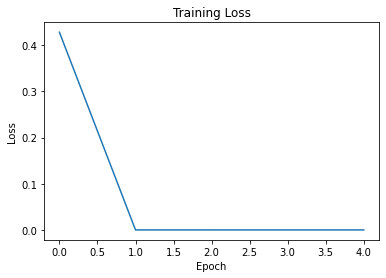

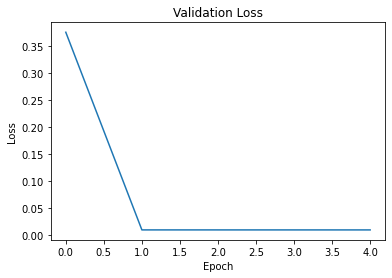

In [7]:
# Plot the training and validation loss curves per epoch
# Plot your training and validation loss per epoch
print(per_epoch_loss_train)
print(per_epoch_loss_val)
plt.plot(per_epoch_loss_train)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(per_epoch_loss_val)
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [8]:
# Print out the accuracy of your classifier on your validation dataset
y_pred = my_nn.predict(X_val)

# Convert predictions to binary outputs
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0
cf = confusion_matrix(y_val, y_pred)
accuracy = (cf[0,0] + cf[1,1]) / np.sum(cf) # (TP+TN)/(TP+TN+FP+FN)
accuracy

0.9990817263544536